In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

# Factorize & select required columns

In [10]:
df = pd.read_csv("all_files_spi.csv")
H = []
D = []
A = []

print(df.shape)
for i in range(len(df['FTR'])):
    if df['FTR'][i] == "H":
        H.append(1)
        A.append(0)
        D.append(0)
    if df['FTR'][i] == "D":
        H.append(0)
        A.append(0)
        D.append(1)
    if df['FTR'][i] == "A":
        H.append(0)
        A.append(1)
        D.append(0)
        #df['D'][i] = 0
       # df['A'][i] = 0
df['H']= H
df['D']= D
df['A']= A

(24029, 104)


In [13]:
#df['label'] = pd.factorize(df['FTR'])[0]
#df['HomeTeam'] = pd.factorize(df['HomeTeam'])[0]
#df['AwayTeam'] = pd.factorize(df['AwayTeam'])[0]
df['Referee'] = pd.factorize(df['Referee'])[0]
df['Div'] = pd.factorize(df['Div'])[0]
# 0 = premier league
df['Season'] = pd.factorize(df['Season'])[0]


In [14]:
req_columns =['Season', 'Div',#'HomeTeam', 'AwayTeam',
              'Referee',
              
              #Bookmakers
              'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
              'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA',  
              'VCH', 'VCD', 'VCA', 
              

              
              # Team dependent feat
              # Away Team
              'C_AC', 'C_AF', 'C_AR', 'C_AS', 'C_AST', 'C_AY', 'C_FTAG', "spi_A",'C_FTAP','F_AT',
              
              # Home Team
              'C_HC', 'C_HF', 'C_HR', 'C_HS', 'C_HST', 'C_HY', 'C_FTHG', "spi",'C_FTHP', 'F_HT',
              
              # Current match --> 'FTHP', 'FTAP',
              
            
             "spi_A","spi",
              'H','A','D'
             ]
     

df = df[req_columns]


# Dd to Np & Fill NaN 

In [15]:
df.fillna(0, inplace=True) # data = np.array(df)


data = np.array(df)
#data = data / (data.max(axis=0))
#data = np.nan_to_num(data)


/Users/stefansamba/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Train Test Split

In [16]:
X = data[:,:-3]
y = data[:,-3:]

X = X / (X.max(axis=0))


print(y[0])

[1. 0. 0.]


In [139]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, shuffle=True) 
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25, random_state=42,shuffle=True)

# In this way, train, val, test set will be 60%, 20%, 20% of the dataset respectively.

x_len = X_train.shape[1]

tot = len(X)


# Multilayer Perceptron

In [112]:
import keras
keras.__version__

'2.2.4'

In [113]:
len1 = int(len(X_train[1]))
print(len1)

43


In [125]:
from keras import models
from keras import layers

# number of hidden neurons can vary from 1 to 16
#hidden = 16
network = models.Sequential()

network.add(layers.Dense(10, use_bias='true', activation='sigmoid', input_shape=(len1,)))


network.add(layers.Dense(3, use_bias='true', activation='sigmoid'))

In [126]:
keras.initializers.RandomNormal(mean=0.0, stddev=0.05)

In [129]:
keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [130]:
fitted = network.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

Train on 14417 samples, validate on 4806 samples
Epoch 1/200
14417/14417 [==============================] - 3s 240us/step - loss: 1.1223 - acc: 0.3549 - val_loss: 1.0775 - val_acc: 0.4395
Epoch 2/200
14417/14417 [==============================] - 1s 81us/step - loss: 1.0750 - acc: 0.4366 - val_loss: 1.0726 - val_acc: 0.4395
Epoch 3/200
14417/14417 [==============================] - 1s 58us/step - loss: 1.0732 - acc: 0.4366 - val_loss: 1.0723 - val_acc: 0.4395
Epoch 4/200
14417/14417 [==============================] - 1s 77us/step - loss: 1.0729 - acc: 0.4366 - val_loss: 1.0719 - val_acc: 0.4395
Epoch 5/200
14417/14417 [==============================] - 2s 108us/step - loss: 1.0726 - acc: 0.4366 - val_loss: 1.0716 - val_acc: 0.4395
Epoch 6/200
14417/14417 [==============================] - 1s 75us/step - loss: 1.0723 - acc: 0.4366 - val_loss: 1.0714 - val_acc: 0.4395
Epoch 7/200
14417/14417 [==============================] - 1s 87us/step - loss: 1.0720 - acc: 0.4366 - val_loss: 1.0711 -

14417/14417 [==============================] - 1s 68us/step - loss: 1.0411 - acc: 0.4684 - val_loss: 1.0401 - val_acc: 0.4702
Epoch 60/200
14417/14417 [==============================] - 1s 44us/step - loss: 1.0407 - acc: 0.4686 - val_loss: 1.0402 - val_acc: 0.4694
Epoch 61/200
14417/14417 [==============================] - 1s 43us/step - loss: 1.0406 - acc: 0.4684 - val_loss: 1.0398 - val_acc: 0.4696
Epoch 62/200
14417/14417 [==============================] - 1s 53us/step - loss: 1.0403 - acc: 0.4683 - val_loss: 1.0396 - val_acc: 0.4711
Epoch 63/200
14417/14417 [==============================] - 1s 69us/step - loss: 1.0401 - acc: 0.4681 - val_loss: 1.0391 - val_acc: 0.4709
Epoch 64/200
14417/14417 [==============================] - 1s 59us/step - loss: 1.0398 - acc: 0.4688 - val_loss: 1.0391 - val_acc: 0.4694
Epoch 65/200
14417/14417 [==============================] - 1s 69us/step - loss: 1.0397 - acc: 0.4703 - val_loss: 1.0387 - val_acc: 0.4713
Epoch 66/200
14417/14417 [==============

Epoch 118/200
14417/14417 [==============================] - 1s 57us/step - loss: 1.0353 - acc: 0.4732 - val_loss: 1.0347 - val_acc: 0.4757
Epoch 119/200
14417/14417 [==============================] - 1s 50us/step - loss: 1.0352 - acc: 0.4733 - val_loss: 1.0346 - val_acc: 0.4750
Epoch 120/200
14417/14417 [==============================] - 1s 63us/step - loss: 1.0351 - acc: 0.4728 - val_loss: 1.0347 - val_acc: 0.4744
Epoch 121/200
14417/14417 [==============================] - 1s 69us/step - loss: 1.0350 - acc: 0.4725 - val_loss: 1.0346 - val_acc: 0.4742
Epoch 122/200
14417/14417 [==============================] - 1s 48us/step - loss: 1.0351 - acc: 0.4723 - val_loss: 1.0344 - val_acc: 0.4748
Epoch 123/200
14417/14417 [==============================] - 1s 45us/step - loss: 1.0350 - acc: 0.4727 - val_loss: 1.0342 - val_acc: 0.4742
Epoch 124/200
14417/14417 [==============================] - 1s 43us/step - loss: 1.0350 - acc: 0.4739 - val_loss: 1.0342 - val_acc: 0.4711
Epoch 125/200
14417/

14417/14417 [==============================] - 1s 41us/step - loss: 1.0335 - acc: 0.4732 - val_loss: 1.0333 - val_acc: 0.4777
Epoch 177/200
14417/14417 [==============================] - 1s 79us/step - loss: 1.0336 - acc: 0.4730 - val_loss: 1.0334 - val_acc: 0.4790
Epoch 178/200
14417/14417 [==============================] - 1s 54us/step - loss: 1.0336 - acc: 0.4740 - val_loss: 1.0329 - val_acc: 0.4738
Epoch 179/200
14417/14417 [==============================] - 1s 80us/step - loss: 1.0336 - acc: 0.4740 - val_loss: 1.0331 - val_acc: 0.4773
Epoch 180/200
14417/14417 [==============================] - 1s 71us/step - loss: 1.0335 - acc: 0.4731 - val_loss: 1.0332 - val_acc: 0.4742
Epoch 181/200
14417/14417 [==============================] - 1s 72us/step - loss: 1.0336 - acc: 0.4727 - val_loss: 1.0332 - val_acc: 0.4769
Epoch 182/200
14417/14417 [==============================] - 1s 53us/step - loss: 1.0335 - acc: 0.4740 - val_loss: 1.0331 - val_acc: 0.4782
Epoch 183/200
14417/14417 [=======

# Statistics

In [138]:

network.save('model_mlp3.h5')  # creates a HDF5 file 'my_model.h5'



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


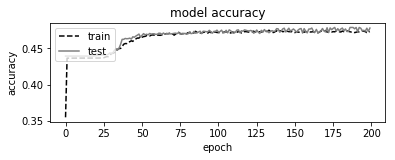

In [131]:
history = fitted 
   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'],color ='black',linestyle='dashed')  
plt.plot(history.history['val_acc'],color ='grey',linestyle='solid')  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
#plt.savefig('model-12-1.png')



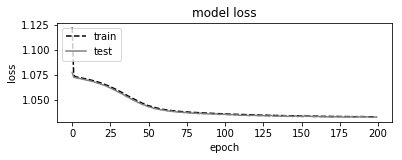

In [132]:
 # summarize history for loss  

plt.subplot(212)  

plt.plot(history.history['loss'],color ='black',linestyle='dashed')  
plt.plot(history.history['val_loss'],color ='grey',linestyle='solid')  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
#plt.savefig('model-12-2.png')


In [133]:
scores = network.evaluate(X_test, y_test)
loss = scores[0]
accuracy = scores[1]


print()
print("Loss = \t\t{}".format(loss))
print("Accuracy = \t{}".format(accuracy))
print("Random \t= \t0.33")
#print("On Distr = \t{}".format(df.label.value_counts()[0]/sum(df.label.value_counts())*100))


4806/4806 [==============================] - 0s 30us/step

Loss = 		1.027355612440502
Accuracy = 	0.4787765293383271
Random 	= 	0.33
